In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
baseline = pd.read_csv("results/baseline.csv")
baseline

,language,train_f1,val_f1,test_f1
0,mg,0.993728,0.933673,0.960352
1,fo,0.974224,0.897482,0.901099
2,co,0.956204,0.852308,0.813230
3,hsb,0.951443,0.923387,0.854578
4,bh,0.981549,0.888689,0.802120
5,cv,0.977741,0.892617,0.830443


In [10]:
df = pd.read_csv("results/transfer_learning.csv")
df.groupby("augmentation_factor")[
    ["train_f1", "val_f1", "test_f1", "improvement"]
].mean()

,train_f1,val_f1,test_f1,improvement
augmentation_factor,,,,
1,0.970800,0.920192,0.876111,1.983040
2,0.968500,0.923408,0.869995,1.181159
3,0.963837,0.919863,0.887288,3.292582
4,0.958961,0.934403,0.886176,3.186371
5,0.946276,0.917436,0.876714,2.037519
6,0.950964,0.918573,0.889738,3.594141
7,0.961987,0.919295,0.879070,2.264163
8,0.955232,0.918999,0.872665,1.449523
9,0.973328,0.934367,0.893735,4.028554


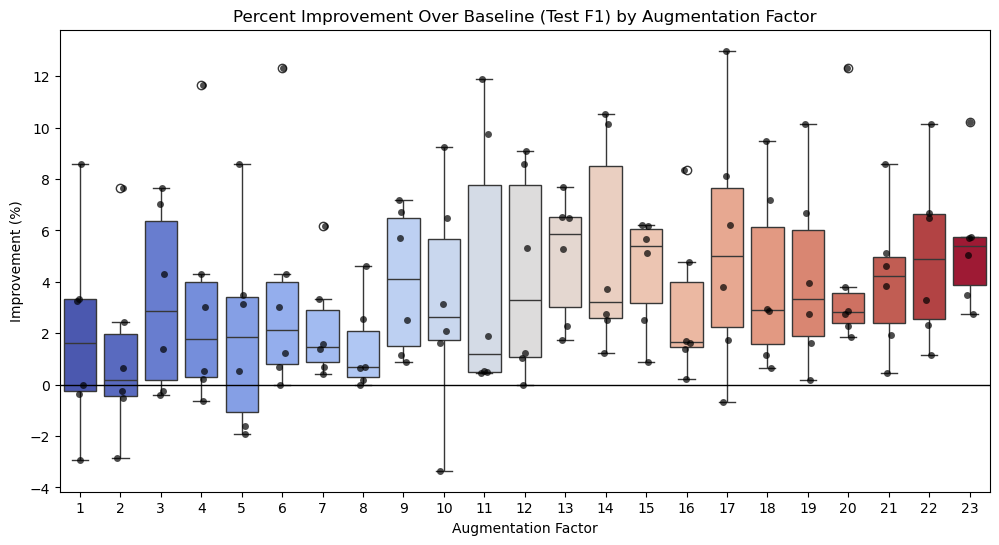

In [11]:
# Load transfer (augmented) data
df = pd.read_csv("results/transfer_learning.csv")

# Visualization using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x="augmentation_factor",
    y="improvement",
    legend=False,
    hue="augmentation_factor",
    palette="coolwarm",
)
sns.stripplot(
    data=df,
    x="augmentation_factor",
    y="improvement",
    color="black",
    jitter=True,
    alpha=0.7,
)

plt.axhline(y=0, color="black", linewidth=1)
plt.title("Percent Improvement Over Baseline (Test F1) by Augmentation Factor")
plt.xlabel("Augmentation Factor")
plt.ylabel("Improvement (%)")
plt.show()

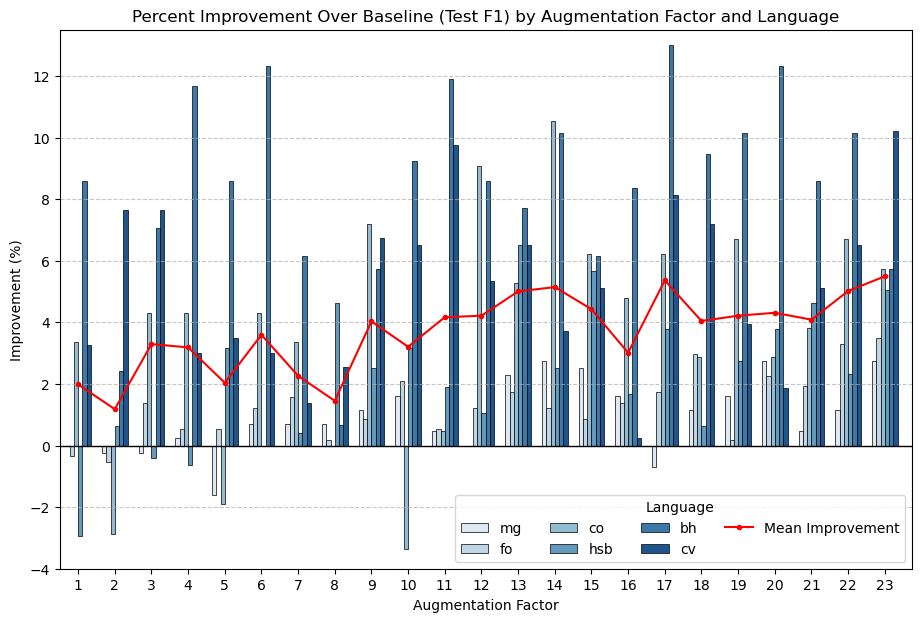

In [12]:
# Visualization using Seaborn
plt.figure(figsize=(11, 7))
ax = sns.barplot(
    data=df,
    x="augmentation_factor",
    y="improvement",
    hue="low_resource_lang",
    palette="Blues",
    dodge=True,
    width=0.7,
    edgecolor="black",
    linewidth=0.5,
)

language_avgs = df.groupby("augmentation_factor")["improvement"].mean()

plt.plot(
    range(max(language_avgs.index)),
    language_avgs,
    color="red",
    marker=".",
    label="Mean Improvement",
)

plt.axhline(y=0, color="black", linewidth=1)
plt.title(
    "Percent Improvement Over Baseline (Test F1) by Augmentation Factor and Language"
)
plt.xlabel("Augmentation Factor")
plt.ylabel("Improvement (%)")
plt.legend(title="Language", loc="lower right", ncol=4)

# Improve readability
plt.xticks(rotation=0)
plt.ylim(-4, 13.5)
plt.xlim(-0.5, max(df["augmentation_factor"]) - 0.25)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

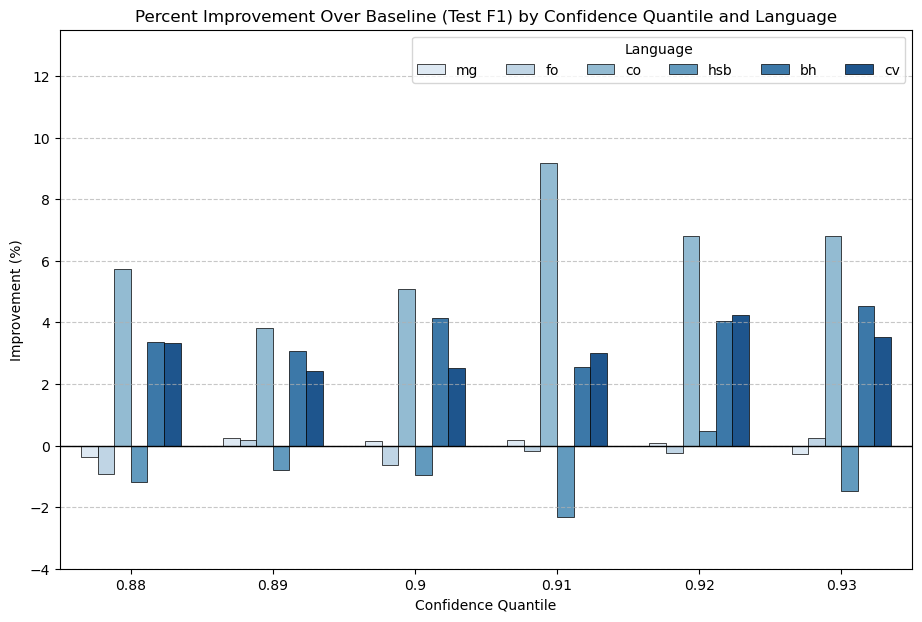

In [13]:
df = pd.read_csv("results/full_iterative_pseudo_labeling.csv")

# Visualization using Seaborn
plt.figure(figsize=(11, 7))
ax = sns.barplot(
    data=df,
    x="confidence_quantile",
    y="improvement",
    hue="language",
    palette="Blues",
    dodge=True,
    width=0.7,
    edgecolor="black",
    linewidth=0.5,
    errorbar=None,
)

language_avgs = df.groupby("confidence_quantile")["improvement"].mean()

plt.axhline(y=0, color="black", linewidth=1)
plt.title(
    "Percent Improvement Over Baseline (Test F1) by Confidence Quantile and Language"
)
plt.xlabel("Confidence Quantile")
plt.ylabel("Improvement (%)")
plt.legend(title="Language", loc="upper right", ncol=6)

# Improve readability
plt.xticks(rotation=0)
plt.ylim(-4, 13.5)
plt.xlim(-0.5, 5.5)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()